In [1]:
from astropy.io import ascii as asc
import astropy.units as u
from matplotlib import pyplot as plt
from supernova import LightCurve2
import glob
import os
import sys
import numpy as np
import visualization as vis
%matplotlib inline
plt.style.use('seaborn-poster')
import matplotlib as mpl
#plt.style.use('default')

In [2]:
sys.path.append('/Users/bostroem/Desktop/research/not_my_code/SNEC-1.01/')
import chisq_analysis

# Get Photometry

In [4]:
sn15oz = LightCurve2('asassn-15oz')
sn15oz.get_photometry()
sn15oz.get_abs_mag()

# Get Model

In [5]:
ni_mass = [0.083, 0.0965, 0.11]
energies = [0.5, 0.8, 1.1, 1.4, 1.7, 2.0]
masses = [11, 13, 15, 16, 17, 18, 21]
ni_mixing = [5.0]
time_offsets = np.arange(-4, 4, 1)
Kvalues = [10, 20, 30, 35, 40, 50, 60]
radii = [1500, 1800, 2100, 2400, 2700, 3000, 3300]

snec_models = '/Users/bostroem/macfusion/SNEC/snec_models/'
snname = 'asassn15oz'
S2_start = 50
S2_end = 88  #Vary this parameter
snec_15oz = chisq_analysis.SnecAnalysis(snname, snec_models, S2_start, S2_end, 
                 ni_mass, ni_mixing, masses, energies, time_offsets, 
                 Kvalues, radii, fig_dir='../figures')

In [7]:
best_model_csm_dir = os.path.join(snec_models, 
                                 'Ni_mass_{:1.4f}'.format(0.083),
                                 'Ni_mixing_{:1.1f}'.format(5.0),
                                 'M{:2.1f}'.format(18.0),
                                 'E_{:1.3f}'.format(1.400),
                                 'K_{:2.1f}'.format(10.0), 
                                 'R_{}'.format(2400),
                                 'Data')
print(best_model_csm_dir)
best_model_csm_data = snec_15oz.prepare_model_data(best_model_csm_dir)

/Users/bostroem/macfusion/SNEC/snec_models/Ni_mass_0.0830/Ni_mixing_5.0/M18.0/E_1.400/K_10.0/R_2400/Data


FileNotFoundError: [Errno 2] No such file or directory: '/Users/bostroem/macfusion/SNEC/snec_models/Ni_mass_0.0830/Ni_mixing_5.0/M18.0/E_1.400/K_10.0/R_2400/Data/magnitudes.dat'

In [9]:
best_model_bare_dir = '/Users/bostroem/macfusion/bostroem/research/not_my_code/SNEC/asassn15oz/mixing_5.0/M18/E_1.4/Data'
best_model_bare_data = snec_15oz.prepare_model_data(best_model_bare_dir)

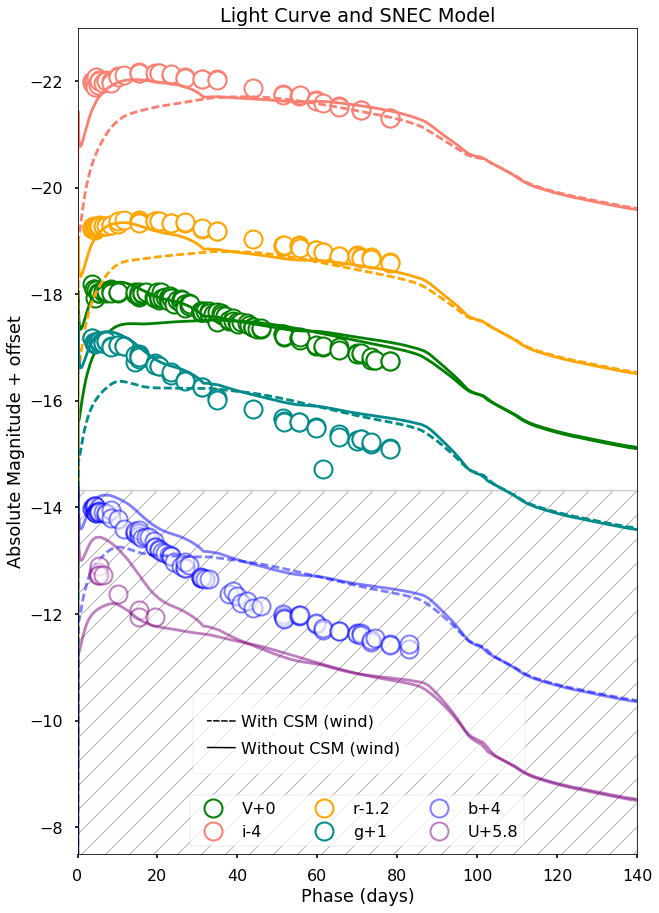

In [80]:
fig = plt.figure(figsize=(9.26, 12.79))
mpl.rcParams['lines.markersize']=18
ax = fig.add_subplot(111)
toffset = -4
ax.axhspan(-4, -14.3, hatch='/', facecolor='none', edgecolor='k')
ax.axhspan(-4, -14.3, color='white', alpha = 0.7)


ax.set_title('Light Curve and SNEC Model')
ax.plot(sn15oz.phase['V']+toffset, sn15oz.abs_mag['V'], 'o', mec='g', mew=2, 
         markerfacecolor='w', label='V+0')
ax.plot(best_model_csm_data['time'], best_model_csm_data['V'], 'g')
ax.plot(best_model_bare_data['time'], best_model_bare_data['V'], 'g')

ax.plot(sn15oz.phase['i']+toffset, sn15oz.abs_mag['i']-4, 'o', mec='Salmon', mew=2,  markerfacecolor='w', label='i-4')
ax.plot(best_model_csm_data['time'], best_model_csm_data['i']-4, color='Salmon')
ax.plot(best_model_bare_data['time'], best_model_bare_data['i']-4, ls='--', color='Salmon')

ax.plot(sn15oz.phase['r']+toffset, sn15oz.abs_mag['r']-1.2, 'o', mec='orange', mew=2,  markerfacecolor='w', label='r-1.2')
ax.plot(best_model_csm_data['time'], best_model_csm_data['r']-1.2, color='orange')
ax.plot(best_model_bare_data['time'], best_model_bare_data['r']-1.2, ls='--', color='orange')


ax.plot(sn15oz.phase['g']+toffset, sn15oz.abs_mag['g']+1, 'o', mec='DarkCyan', mew=2, markerfacecolor='w', label='g+1')
ax.plot(best_model_csm_data['time'], best_model_csm_data['g']+1, color='DarkCyan')
ax.plot(best_model_bare_data['time'], best_model_bare_data['g']+1, ls='--', color='DarkCyan')

ax.plot(sn15oz.phase['B']+toffset, sn15oz.abs_mag['B']+4, 'o', mec = 'b', mew=2, markerfacecolor='w', alpha=0.5, label='b+4')
ax.plot(best_model_csm_data['time'], best_model_csm_data['B']+4, color='b', alpha=0.5)
ax.plot(best_model_bare_data['time'], best_model_bare_data['B']+4, ls='--', color='b',  alpha=0.5)

ax.plot(sn15oz.phase['U']+toffset, sn15oz.abs_mag['U']+5.8, 'o', mec='purple', mew=2.,mfc='w',  alpha=0.5, label='U+5.8')
ax.plot(best_model_csm_data['time'], best_model_csm_data['U']+5.8, color='purple',  alpha=0.5)
ax.plot(best_model_bare_data['time'], best_model_bare_data['U']+5.8, color='purple', alpha=0.5)
ax.barh(-9.75, 83, 1.5,29, facecolor='w', edgecolor='LightGrey', alpha=0.75)
ax.annotate(s='With CSM (wind)', xy=(32, -10), xytext=(41, -9.9), xycoords='data', 
            arrowprops={'arrowstyle':'-',  'linestyle':'--','linewidth':1.5}, 
            fontsize=16,backgroundcolor='w')
ax.annotate(s='Without CSM (wind)', xy=(32, -9.5), xytext=(41, -9.4), xycoords='data', 
            arrowprops={'arrowstyle':'-', 'linewidth':1.5}, 
            fontsize=16, backgroundcolor='w')


ax.set_ylim(-7.5, -23)
ax.set_xlim(0, 140)
ax.set_xlabel('Phase (days)')
ax.set_ylabel('Absolute Magnitude + offset')
#plt.grid()
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[::3], labels[::3], ncol=3, loc='lower center')
plt.tight_layout()
plt.savefig('../figures/lightcurve_snec.pdf')

In [79]:
plt.savefig('../figures/lightcurve_snec.pdf')

In [23]:
fig.get_size_inches()

array([ 9.  ,  7.24])